In [1]:
import numpy as np
import numpy as np
from sklearn import svm

train_data = np.load('train_data1.npy')
train_label = np.load('train_label1.npy')
test_data = np.load('test_data1.npy')
test_label = np.load('test_label1.npy')

class SVM:

    feature_max = []  # max values of features
    feature_min = []  # min values of features
    clf = None        # model
    
    def __init__(self, train_data, train_label):
        self.feature_max = []  # init
        self.feature_min = []   # init
        self.max_min_features(train_data)   # calculate min-max values and assing
        self.clf = svm.SVC(gamma=0.001, C=100.)   # construct model
        self.clf.fit(self.normalize(train_data), train_label)  # train
    
    def max_min_features(self, data):
        (row, column) = np.shape(data)
        for j in range(0, column):   # for each of features
            mx, mn = np.max(data[:,j]), np.min(data[:,j])  # calculate min and max
            self.feature_max.append(mx)  # assign
            self.feature_min.append(mn)  # assign

    def normalize(self,data):
        (row, column) = np.shape(data)
        new = np.zeros((row, column))
        for j in range(0, column):   # for each feature
            mx, mn = self.feature_max[j], self.feature_min[j] # get min and max
            for i in range(0, row):  # for each point
                new[i,j] = (data[i,j] - mn) / (mx-mn) # max-min scale
        return new  # return scaled

    def test(self, test_data, test_label):
        y_pred = self.clf.predict(self.normalize(test_data))  # predict with normalization
        correct_prediction = np.equal(y_pred, test_label)    # check for accuracy
        return np.mean(correct_prediction.astype(np.float32))  #calculate
    
    
svMachine = SVM(train_data, train_label)
accuracy = svMachine.test(test_data, test_label)    
    
print(accuracy)


1.0


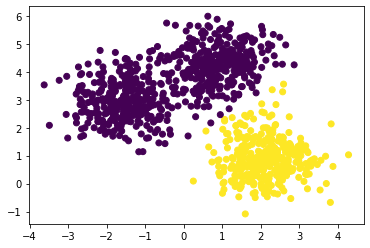

0.995


In [2]:
import numpy as np
data = np.load('data2.npy')
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans as KM
 
labels = KM(n_clusters=2, random_state=0).fit(data).labels_ # fit data into 2 clusters and get true labels

plt.scatter(data[:,0], data[:,1], c=labels)  # scatter
plt.show()

stacked = np.column_stack((labels.reshape((1000, 1)), data)) # stack labels with data
np.random.seed(1)        #random seed
np.random.shuffle(stacked)  # shuffle stacked matrix
test_data, train_data = stacked[:200, 1:], stacked[200:, 1:]  # get data
test_label, train_label = stacked[:200, 0], stacked[200:, 0]  # get labels
    
svMachine = SVM(train_data, train_label)     # use prewritten class to train
accuracy = svMachine.test(test_data,test_label)  # test 

print(accuracy)
